# College Student Stress Classifier

In this file we:
- Import and preprocess college student stress data
- Test various classifiers for college student stress
- View the feature importances of our best-performing classifier to gain insights

### Import Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [33]:
df = pd.read_csv('data/StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


### Data Exploration

First, some quick checks.

In [34]:
# check data types
print("Data Types:")
print(df.dtypes)
print("--------------------------------")

# check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
print("--------------------------------")

# check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())
print("--------------------------------")

# check dataframe shape
print("\nDataFrame Shape:")
print(df.shape)

Data Types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object
--------------------------------

Missing Values:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression              

No missing data, and all values are ints! 

Next, lets make sure stress level has even counts across each level.

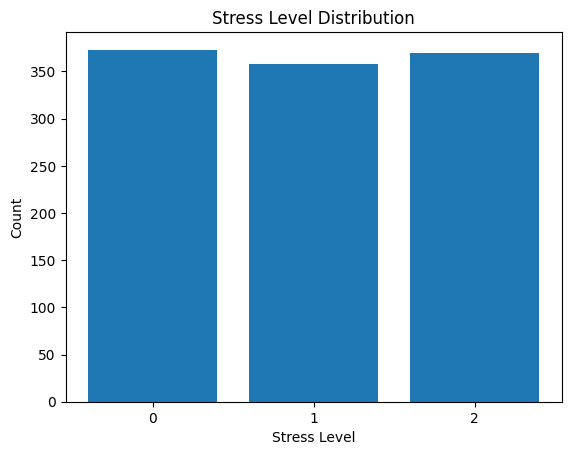

In [35]:
# bar graph of stress level
plt.bar(df['stress_level'].value_counts().index, df['stress_level'].value_counts().values)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(df['stress_level'].value_counts().index, df['stress_level'].value_counts().index)
plt.title('Stress Level Distribution')
plt.show()

Distribution looks approximately uniform!

Next, lets distinguish our variables, we'll need these lists later!

In [36]:
categorical_vars = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 
'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 
'social_support', 'peer_pressure', 'future_career_concerns', 'extracurricular_activities', 'bullying']

binary_vars = ['mental_health_history']

target_var = ['stress_level']

continuous_vars = ['anxiety_level', 'self_esteem', 'depression']

Random forests do not need one-hot-encoding or scaling, so we are already prepared to create our first model!

### Random Forest Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        74
           1       0.89      0.93      0.91        72
           2       0.86      0.91      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220

--------------------------------
Confusion Matrix:
[[62  4  8]
 [ 2 67  3]
 [ 3  4 67]]
--------------------------------
Accuracy:
0.8909090909090909
--------------------------------


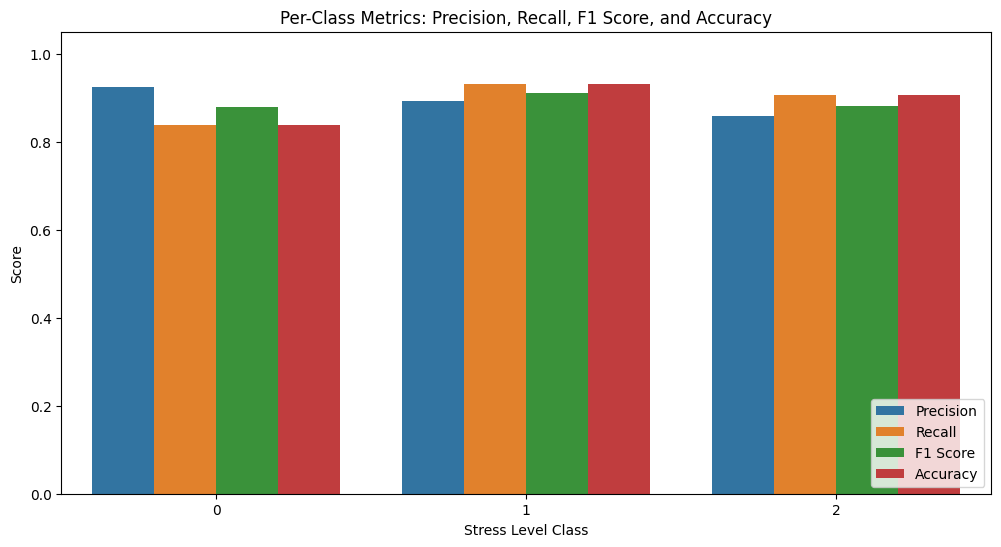

--------------------------------
Feature Importance:
blood_pressure: 0.1452
sleep_quality: 0.0809
teacher_student_relationship: 0.0713
academic_performance: 0.0664
basic_needs: 0.0661
depression: 0.0654
self_esteem: 0.0638
social_support: 0.0572
anxiety_level: 0.0563
bullying: 0.0500
safety: 0.0480
peer_pressure: 0.0431
extracurricular_activities: 0.0425
future_career_concerns: 0.0402
headache: 0.0313
living_conditions: 0.0202
study_load: 0.0190
noise_level: 0.0171
breathing_problem: 0.0114
mental_health_history: 0.0045


In [37]:
# Define features (X) and target (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split into train and test sets (80% train, 20% test, stratify to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# create random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
rf = model

# test/evaluate model
y_pred = model.predict(X_test)

# print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("--------------------------------")

# print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------")

# print accuracy
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("--------------------------------")

# Calculate precision, recall, f1, and accuracy by class
classes = sorted(y.unique())
precision = precision_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
recall = recall_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
f1 = f1_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
# For per-class accuracy: proportion of correct predictions for each class
accuracy_per_class = []
for cls in classes:
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    accuracy_per_class.append(acc)
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Accuracy': accuracy_per_class
})
metrics_df_melted = metrics_df.melt(id_vars='Class', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df_melted, x='Class', y='Score', hue='Metric')
plt.ylim(0, 1.05)
plt.title('Per-Class Metrics: Precision, Recall, F1 Score, and Accuracy')
plt.ylabel('Score')
plt.xlabel('Stress Level Class')
plt.legend(loc='lower right')
plt.show()
print("--------------------------------")

# print feature importance
print("Feature Importance:")
feature_importances = list(zip(X.columns, model.feature_importances_))
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)
for name, importance in feature_importances_sorted:
    print(f"{name}: {importance:.4f}")

Our random forest performed well, and performed fairly evenly across classes! On to the next classifier!

### Logistic Regression Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

--------------------------------
Confusion Matrix:
[[63  5  6]
 [ 3 66  3]
 [ 7  2 65]]
--------------------------------
Accuracy:
0.8818181818181818
--------------------------------


/Users/shreyasramulu/Personal Projects/stress/tfenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


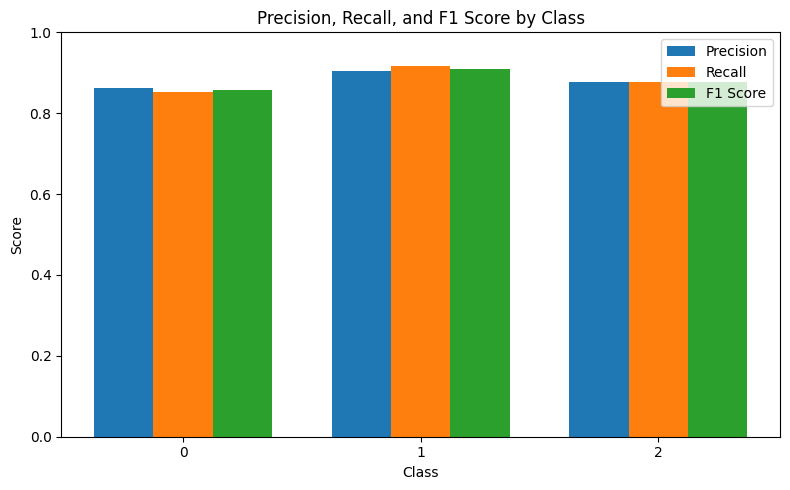

--------------------------------
Feature Importance (coefficients):
blood_pressure: 1.8299
social_support: 1.0241
mental_health_history: 0.4094
academic_performance: 0.2840
study_load: -0.2830
basic_needs: 0.2474
self_esteem: 0.1941
headache: -0.1650
teacher_student_relationship: 0.1545
safety: 0.1495
extracurricular_activities: -0.1414
sleep_quality: 0.1032
depression: -0.0917
noise_level: -0.0888
peer_pressure: -0.0818
anxiety_level: -0.0673
breathing_problem: -0.0535
bullying: -0.0461
living_conditions: -0.0158
future_career_concerns: -0.0059


In [38]:
# train/test split
X = df.drop('stress_level', axis=1)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaling for continuous variables
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test_scaled[continuous_vars] = scaler.transform(X_test[continuous_vars])

# create logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# test/evaluate model
y_pred = model.predict(X_test_scaled)

# print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("--------------------------------")
# print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------")

# print accuracy
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("--------------------------------")

# Calculate precision, recall, f1, and accuracy by class
precisions = precision_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
recalls = recall_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
f1s = f1_score(y_test, y_pred, average=None, labels=classes, zero_division=0)

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, precisions, width, label='Precision')
plt.bar(x, recalls, width, label='Recall')
plt.bar(x + width, f1s, width, label='F1 Score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score by Class')
plt.xticks(x, classes)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()
print("--------------------------------")

# print feature importance
print("Feature Importance (coefficients):")
feature_coef_pairs = list(zip(X.columns, model.coef_[0]))
feature_coef_pairs_sorted = sorted(feature_coef_pairs, key=lambda x: abs(x[1]), reverse=True)
for feature, coef in feature_coef_pairs_sorted:
    print(f"{feature}: {coef:.4f}")


Our logistic regression model also performs well and evenly across classes. However, our random forest still performed slightly better so far.

### Neural Network

2025-08-25 19:57:43.159966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-08-25 19:57:43.187058: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


7/7 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.93      0.90      0.92        72
           2       0.88      0.86      0.87        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

--------------------------------
Confusion Matrix:
[[65  3  6]
 [ 4 65  3]
 [ 8  2 64]]
--------------------------------


2025-08-25 19:57:50.416721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


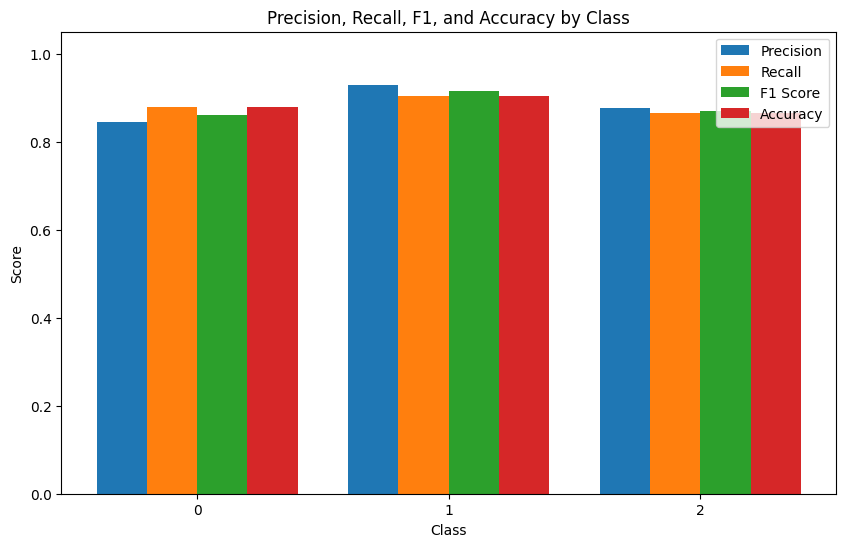

Accuracy:
0.8818181818181818
--------------------------------
Feature Importance (sorted by absolute value):
academic_performance: 0.5588
social_support: 0.3988
noise_level: -0.3830
breathing_problem: -0.3391
self_esteem: 0.3171
study_load: 0.2325
basic_needs: 0.2266
safety: -0.2259
teacher_student_relationship: 0.2135
mental_health_history: -0.1983
anxiety_level: 0.1722
future_career_concerns: 0.1482
blood_pressure: -0.1413
living_conditions: 0.0926
headache: -0.0782
depression: 0.0713
sleep_quality: -0.0290
extracurricular_activities: 0.0091
bullying: -0.0042
peer_pressure: 0.0016


In [39]:
# train/test split
X = df.drop('stress_level', axis=1)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaling for continuous variables
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test_scaled[continuous_vars] = scaler.transform(X_test[continuous_vars])

# If stress_level is multiclass, convert to categorical and use categorical_crossentropy
num_classes = len(np.unique(y_train))
if num_classes > 2:
    # Multiclass classification
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train model
    model.fit(X_train_scaled, y_train_cat, epochs=30, batch_size=32, verbose=0)
    # Predict
    y_pred_probs = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_probs, axis=1)
else:
    # Binary classification
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    # Train model
    model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0)
    # Predict
    y_pred_probs = model.predict(X_test_scaled)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=classes, zero_division=0))
print("--------------------------------")

# print confusion matrix   
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=classes))
print("--------------------------------")

# Visualize precision, recall, f1, and accuracy by class
precisions = precision_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
recalls = recall_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
f1s = f1_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
accuracies = []
for cls in classes:
    idx = (y_test == cls)
    if np.sum(idx) > 0:
        accuracies.append(accuracy_score(y_test[idx], y_pred[idx]))
    else:
        accuracies.append(0)

metrics = [precisions, recalls, f1s, accuracies]
metric_names = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

x = np.arange(len(classes))
width = 0.2

plt.figure(figsize=(10,6))
for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    plt.bar(x + i*width, metric, width, label=name)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, F1, and Accuracy by Class')
plt.xticks(x + width*1.5, classes)
plt.ylim(0, 1.05)
plt.legend()
plt.show()

# print accuracy
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("--------------------------------")

# print feature importance
print("Feature Importance (sorted by absolute value):")
weights = model.get_weights()[0].flatten()
feature_importance = dict(zip(X.columns, weights))
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, weight in sorted_features:
    print(f"{feature}: {weight:.4f}")


Our neural network also performs well, but we can conclude that our random forest performed the best!

### Insights

##### Feature Importances
**Blood pressure** was the feature with the highest importance in each model, indicating that abnormal blood pressure levels could be a large indicator of higher stress. 
Aside from blood pressure, **feature importances varied heavily across models**, suggesting that many features play a role in contributing to stress, rather than a select few.

##### Best Performing Model
All models performed fairly evenly with regard to both evaluation metrics, and performance by individual class. Since our random forest had the highest evaluation metrics (by a very small margin),
it would be the ideal model to use. The strong performance of the random forest is unsurprising, due its ability to handle tabular data and ordinal features. 